In [36]:
import JSON
using Plots
using HDF5
using Trapz
include("tools.jl")
include("get_grid.jl")
include("get_params.jl")

get_params (generic function with 2 methods)

In [37]:
border = import_border("data/border.json")
dx = 20
Nx, Ny, xrange, yrange, isgrid, isborder, n = get_grid(border, Float64(dx))

x = repeat(reshape(xrange,1,Nx),Ny,1)
y = repeat(reshape(yrange,Ny,1),1,Nx)
x_for_bx = repeat(reshape(xrange,1,Nx),Ny,1) .- dx/2
y_for_bx = repeat(reshape(yrange,Ny,1),1,Nx)
x_for_by = repeat(reshape(xrange,1,Nx),Ny,1)
y_for_by = repeat(reshape(yrange,Ny,1),1,Nx) .+ dx/2;


In [38]:
recompute_param = true
sigma_l = 100.
if(recompute_param)
    bx, by, p, m, d = get_params(isborder, sigma_l, "data/pantagruel.h5", "grid_params_20_100.h5")
else
    bx, by, p, m, d = get_params("grid_params_20.h5")
end


(157,)
(117,)
(117, 157)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
Numeric inertia: 181.46574099999995
Actual inertia: 181.465741
Numeric damping: 59.422001900000005
Actual damping: 59.422001899999984
Numeric power draw: 3112.8776000000003
Actual power draw: 3112.8776
Numeric power gen: 3191.2937094111926
Actual power gen: 3191.2937094111903


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [39]:
bx *= dx^(2)

117×157 Matrix{Float64}:
 0.0  0.0  0.0  0.0       0.0     …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0     …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0     …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0       0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  9.30572  11.4611     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                                ⋱  ⋮              

In [40]:
by *= dx^(2)

117×157 Matrix{Float64}:
 0.0  0.0   0.0     0.0      0.0     …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0     …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0     …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0     0.0      0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  11.681  13.3981  15.2315     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮           

In [ ]:
interval = 200
Niter = 20000
th = zeros(Ny, Nx)

@time begin
    for k in 1:Niter
        dth = 0
        for i in 2:Ny-1
            for j in 2:Nx-1
                if(isgrid[i,j])
                    temp = th[i,j]
                    bij = (by[i-1,j] + by[i,j] + bx[i,j] + bx[i,j+1])
                    (by[i,j] * th[i+1,j] + by[i-1,j] * th[i-1,j] +
                        bx[i,j+1] * th[i,j+1] + bx[i,j] * th[i,j-1])
                    th[i,j] = (by[i,j] * th[i+1,j] + by[i-1,j] * th[i-1,j] + 
                        bx[i,j+1] * th[i,j+1] + bx[i,j] * th[i,j-1] + dx^2*p[i,j]) / bij
                    dth = max(abs(th[i,j] - temp), dth)
                end
            end
        end   
        if(mod(k,interval) == 0)
            println([k, dth])
        end
    end
end


[200.0, 0.0026508308026704785]
[400.0, 0.0023329087013684857]
[600.0, 0.0019754348225455853]
[800.0, 0.001633067551674694]
[1000.0, 0.0015998791836551174]
[1200.0, 0.0015279212096557249]
[1400.0, 0.0014203827771843702]
[1600.0, 0.001297485063287418]
[1800.0, 0.001171378830102654]
[2000.0, 0.0010489819077466045]
[2200.0, 0.0009339727807065046]
[2400.0, 0.0008280748858098264]
[2600.0, 0.0007318561335263318]
[2800.0, 0.0006452195205244315]
[3000.0, 0.0005677019920291571]
[3200.0, 0.0004986553176298258]
[3400.0, 0.00044768065082645414]
[3600.0, 0.0004191960275063966]
[3800.0, 0.00039204777464640905]
[4000.0, 0.00036634476343255784]
[4200.0, 0.00034213229835899917]
[4400.0, 0.000319411465342645]
[4600.0, 0.0002981531477164179]
[4800.0, 0.00027830816436047456]
[5000.0, 0.00025981458183554906]
[5200.0, 0.00024260296387312863]
[5400.0, 0.00022660011381470113]
[5600.0, 0.00021173171546884362]
[5800.0, 0.00019792416901198706]
[6000.0, 0.00018510583942110692]
[6200.0, 0.00017320787719032893]
[640

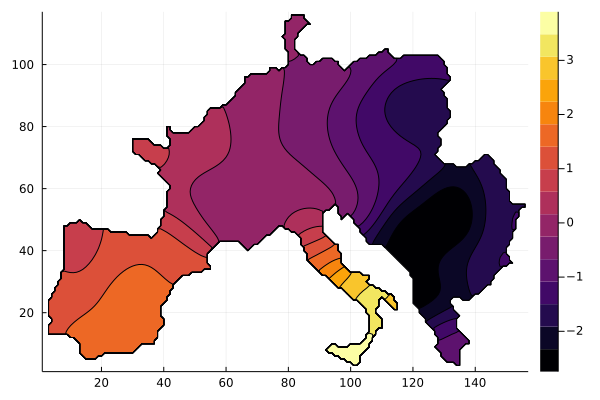

In [34]:
#contour(1:Nx,1:Ny,th, fill=true,levels=-2:0.2:1.6, title="Continuous", colorbar_title = "θ(x,t)")
do_plot(isgrid, th)
# savefig("dx20.png")
#do_plot(isgrid, bx)


In [35]:
println(maximum(filter(!isnan,th)))
println(minimum(filter(!isnan,th)))

3.895455473589708
-2.74380623552789
